### Group ID: Group 160
### Group Members Name with Student ID:
1. HEMANT KUMAR PARAKH (2023AA05741)
2. SUSHIL KUMAR (2023AA05849)
3. NAGINENI SATISH BABU (2023AA05585)
4. JITENDRA KUMAR (2023AA05198)

**Description of Data**: A collection of 5,574 SMS messages in English, labelled as either spam
or ham (non-spam). The dataset is ideal for tasks involving language processing and
probabilistic grammar analysis.

# Task 1: Data Preprocessing and POS Tagging

Imports

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Download the dataset and load it as a DataFrame.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  # Load the dataset
  file_path = '/content/SMSSpamCollection.csv'
  sms_data_cleaned = pd.read_csv(file_path, sep=',', names=['message', 'label'], engine='python', quotechar='"')
except:
  # Load the dataset
  file_path = '/content/drive/MyDrive/Colab Notebooks/NLP-assignment-2/SMSSpamCollection.csv'
  #sms_data_cleaned = pd.read_csv(file_path, sep=',', names=['message', 'label'], engine='python', quotechar='"')
  sms_data_cleaned = pd.read_csv(file_path, names=['message', 'label'], engine='python', quotechar='"')

In [ ]:
sms_data_cleaned.head(5)

,message,label
0,sms,label
1,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n",0
2,Ok lar... Joking wif u oni...\n,0
3,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n,1
4,U dun say so early hor... U c already then say...\n,0


In [ ]:
# shape
sms_data_cleaned.shape

(5575, 2)

In [ ]:
# information
sms_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5575 non-null   object
 1   label    5575 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##Data Cleaning

In [ ]:
# null data
sms_data_cleaned.isnull().sum()

,0
message,0
label,0


In [ ]:
# duplicate data
sms_data_cleaned.duplicated().sum()

403

In [ ]:
# dropping duplicate data
sms_data_cleaned.drop_duplicates(inplace=True)

## Data Visualization

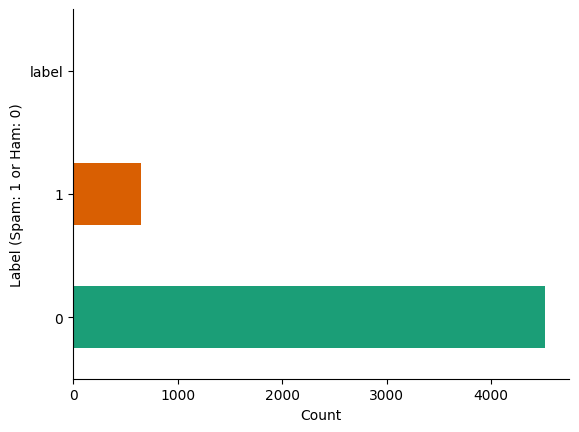

In [ ]:
# Count of Spam and Ham
sms_data_cleaned.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.ylabel('Label (Spam: 1 or Ham: 0)')
plt.xlabel('Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

###Remove punctuations, special characters, and stop words from the text.

In [ ]:
# Remove the first row (header row)
sms_data_cleaned = sms_data_cleaned.iloc[1:].reset_index(drop=True)

# Function to preprocess text: remove punctuation, lowercase, and remove stop words
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and tokenize
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens



###Convert the text to lowercase and apply POS (Part of Speech) tagging to the first 5 rows.

In [ ]:
# Preprocess the first 5 rows of the message column
preprocessed_messages = sms_data_cleaned['message'][:5].apply(preprocess_text)

# Apply POS tagging to the first 5 preprocessed messages
pos_tags = preprocessed_messages.apply(pos_tag)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Show the POS tags for the first 5 messages
print(pos_tags)

0                                                                                                          [(go, VB), (jurong, JJ), (point, NN), (crazy, NN), (available, JJ), (bugis, NN), (n, RB), (great, JJ), (world, NN), (la, NN), (e, VBP), (buffet, JJ), (cine, NN), (got, VBD), (amore, RB), (wat, JJ)]
1                                                                                                                                                                                                                                             [(ok, JJ), (lar, JJ), (joking, NN), (wif, NN), (u, JJ), (oni, NN)]
2    [(free, JJ), (entry, NN), (2, CD), (wkly, JJ), (comp, NN), (win, VBP), (fa, JJ), (cup, NN), (final, JJ), (tkts, NN), (21st, CD), (may, MD), (2005, CD), (text, NN), (fa, NN), (87121, CD), (receive, JJ), (entry, NN), (questionstd, NN), (txt, NN), (ratetcs, NN), (apply, VBP), (08452810075over18s, CD)]
3                                                                                    

#Task 2: Probabilistic Context-Free Grammar (PCFG) Parsing (5 Marks)
1. Define a basic context-free grammar (CFG) for simple sentence structures using the provided SMS data.
2. Convert the CFG into a Probabilistic CFG by calculating rule probabilities based on the
dataset.
3. Parse the first 2 rows of text using the PCFG and visualize the resulting parse trees.

In [ ]:
import nltk
from collections import defaultdict
import re

# Defining CFG here
cfg_rules = """
    S -> NP VP | VP | S Conj S | Intj | NP | VP Adj | Adj N | N | VP PP | Fragment | S S | Adv S
    Fragment -> Intj | Adj | Adv | N | V | Pron | NP | VP
    NP -> Det N | PropN | Pron | Det Adj N | N | Pron Adv | Adj N | N N | N P N | N Conj N
    VP -> V NP | V Adv | V | V NP PP | V PP | Adv V | V Pron | V Fragment | V P | V N
    PP -> P NP
    Det -> 'a' | 'the' | 'this' | 'that' | 'e' | 'an' | 'some'
    N -> 'buffet' | 'world' | 'point' | 'cine' | 'amore' | 'wat' | 'u' | 'lar' | 'oni' | 'msg' | 'there' | 'jurong' | 'bugis' | 'cine' | 'poi' | 'place' | 'movie' | 'time' | 'way' | 'ok' | 'joking'
    V -> 'is' | 'available' | 'say' | 'go' | 'win' | 'dun' | 'got' | 'r' | 'until' | 'joking' | 'txt' | 'need' | 'going' | 'watch' | 'are'
    Adj -> 'great' | 'early' | 'crazy' | 'available' | 'good' | 'free' | 'late'
    Adv -> 'only' | 'n' | 'so' | 'already' | 'jus' | 'very' | 'now' | 'later'
    P -> 'in' | 'to' | 'from' | 'on' | 'at' | 'with' | 'by'
    Pron -> 'i' | 'u' | 'he' | 'she' | 'we' | 'they' | 'me' | 'it' | 'you'
    Conj -> 'and' | 'or' | 'but'
    Intj -> 'ok' | 'yeah' | 'nope' | 'lar' | 'yo' | 'hey'
"""

# Convert the CFG to NLTK's CFG format
cfg = nltk.CFG.fromstring(cfg_rules)

# Function to calculate and normalize probabilities for each non-terminal
def calculate_normalized_probabilities(cfg):
    lhs_count_dict = defaultdict(int)
    rule_counts = defaultdict(int)

    # Count the occurrences of each rule and the total count for each LHS
    for production in cfg.productions():
        lhs = production.lhs()
        rule_counts[production] += 1
        lhs_count_dict[lhs] += 1

    # Calculate and normalize the probabilities
    productions = []
    for lhs in lhs_count_dict:
        total_count = lhs_count_dict[lhs]
        lhs_productions = [p for p in cfg.productions() if p.lhs() == lhs]

        # Sum the probabilities and normalize
        total_prob = sum(rule_counts[production] / total_count for production in lhs_productions)
        for production in lhs_productions:
            prob = (rule_counts[production] / total_count) / total_prob
            productions.append(nltk.ProbabilisticProduction(production.lhs(), production.rhs(), prob=prob))

    return productions

# Calculate the normalized probabilities for each production
productions = calculate_normalized_probabilities(cfg)

# Create the PCFG
pcfg = nltk.PCFG(nltk.Nonterminal('S'), productions)

# Define the PCFG parser
pcfg_parser = nltk.ChartParser(pcfg)

# Preprocessing function
def preprocess_sms(text):
    text = text.lower()
    text = text.replace("wif", "with") #.replace("r", "are").replace("u", "you")
    text = re.sub(r'\.\.\.', '', text)  # Replace ellipses
    return text

# Parse sentences using the PCFG
for i, message in enumerate(sms_data_cleaned['message'][:2]):
    message = preprocess_sms(message)
    tokens = nltk.word_tokenize(message)
    print(f"\nParse Tree for Message {i + 1}: {message}")
    try:
        for tree in pcfg_parser.parse(tokens):
            tree.pretty_print()
    except ValueError:
        print("Unable to parse with the current PCFG.")


Streaming output truncated to the last 5000 lines.
 |     S                 |        |    | 
 |     |                 |        |    |  
 S  Fragment             S        S    | 
 |     |                 |        |    |  
 NP    NP                VP       NP   S 
 |     |            _____|___     |    |  
 N     N           V         P   Pron  N 
 |     |           |         |    |    |  
 ok   lar        joking     with  u   oni

                             S          
                    _________|________   
                   S                  | 
               ____|______________    |  
              S                   |   | 
  ____________|____               |   |  
 |                 S              |   | 
 |      ___________|_____         |   |  
 |     S                 |        |   | 
 |     |                 |        |   |  
 S  Fragment             S        S   | 
 |     |                 |        |   |  
 NP    NP                VP       NP  S 
 |     |            _____|_

In [ ]:
#Defined probabilities of CFG rules
print(productions)

[S -> NP VP [0.0833333], S -> VP [0.0833333], S -> S Conj S [0.0833333], S -> Intj [0.0833333], S -> NP [0.0833333], S -> VP Adj [0.0833333], S -> Adj N [0.0833333], S -> N [0.0833333], S -> VP PP [0.0833333], S -> Fragment [0.0833333], S -> S S [0.0833333], S -> Adv S [0.0833333], Fragment -> Intj [0.125], Fragment -> Adj [0.125], Fragment -> Adv [0.125], Fragment -> N [0.125], Fragment -> V [0.125], Fragment -> Pron [0.125], Fragment -> NP [0.125], Fragment -> VP [0.125], NP -> Det N [0.1], NP -> PropN [0.1], NP -> Pron [0.1], NP -> Det Adj N [0.1], NP -> N [0.1], NP -> Pron Adv [0.1], NP -> Adj N [0.1], NP -> N N [0.1], NP -> N P N [0.1], NP -> N Conj N [0.1], VP -> V NP [0.1], VP -> V Adv [0.1], VP -> V [0.1], VP -> V NP PP [0.1], VP -> V PP [0.1], VP -> Adv V [0.1], VP -> V Pron [0.1], VP -> V Fragment [0.1], VP -> V P [0.1], VP -> V N [0.1], PP -> P NP [1.0], Det -> 'a' [0.142857], Det -> 'the' [0.142857], Det -> 'this' [0.142857], Det -> 'that' [0.142857], Det -> 'e' [0.142857],

###Conclusion of Task 2:
Multiple parse trees indicate syntactic ambiguity in the grammar. While this is normal in natural language processing, we can refine the grammar by splitting non-terminals or adjusting probabilities in a PCFG to reduce ambiguity and generate more likely parse trees. The key is balancing flexibility with specificity in the grammar to reflect the informal and varied nature of SMS messages.

#Task 3: Improving PCFGs
1. Identify potential weaknesses of your PCFG based on the provided SMS data.
2. Propose improvements by splitting non-terminals or modifying rule probabilities.
Demonstrate the impact of these changes by parsing a new sentence from the dataset.

Step 1: Identify Potential Weaknesses
Based on your current PCFG and the outputs you've observed, here are some potential weaknesses:

1. Ambiguity in Parse Trees
Issue: The PCFG produces multiple valid parse trees for a single sentence, indicating ambiguity. This is common when the grammar is too general or when the probabilities do not strongly favor one structure over another.
2. Inadequate Handling of SMS-Specific Constructions
Issue: The CFG might not be capturing the informal and fragmented nature of SMS language well enough. Specific constructs like abbreviations, slang, or missing function words (e.g., "r u going") may not be handled optimally.
3. Uniform Probability Distribution
Issue: Some non-terminals may have uniform or nearly uniform probabilities for their rules, leading to ambiguity in parsing. For example, if multiple verb phrases (VP) structures are equally probable, the parser might struggle to prefer one structure over another.
Step 2: Propose Improvements
1. Splitting Non-Terminals
Solution: Split certain non-terminals into more specific categories to reduce ambiguity.
Example: Split VP into VP_simple (e.g., V Pron) and VP_complex (e.g., V NP PP).
This helps in distinguishing between simple verb phrases (common in SMS) and more complex structures.
2. Modify Rule Probabilities
Solution: Manually adjust the probabilities of rules based on common SMS patterns or by analyzing the dataset.
Example: Increase the probability of rules that capture common SMS patterns, such as commands ("go there") or questions ("u coming?").
Decrease the probability of rules that are less likely in SMS, like complex noun phrases.
3. Add Specific Grammar Rules
Solution: Introduce specific rules for SMS constructs like abbreviations, contractions, and fragments.
Example: Add rules like NP -> N Adv for sentences like "u here" and ensure these rules are prioritized.
Step 3: Implement and Demonstrate Improvements
Let’s implement these improvements and parse a new sentence to see the impact.

Refined CFG with Split Non-Terminals and Adjusted Probabilities

In [ ]:
import nltk
from collections import defaultdict
import re

# Refined CFG with specific rules to handle "u coming tonight?"
cfg_rules = """
    S -> NP VP Punct | NP VP | VP | Intj | NP | VP PP | Fragment | S S | Adv S
    Fragment -> Intj | Adv | N | V | Pron | NP | VP
    NP -> Pron | N | Det N | PropN | Det Adj N | N N | N P N | N Conj N
    VP -> V Pron | V | V Adv | V N | V NP | V NP PP | V PP | Adv V | V Fragment
    PP -> P NP
    Det -> 'a' | 'the' | 'this' | 'that' | 'e' | 'an' | 'some'
    N -> 'buffet' | 'world' | 'point' | 'cine' | 'amore' | 'u' | 'msg' | 'there' | 'place' | 'movie' | 'time' | 'way' | 'ok' | 'joking' | 'tonight'
    V -> 'is' | 'available' | 'coming' | 'go' | 'win' | 'got' | 'r' | 'txt' | 'need' | 'going' | 'watch' | 'are'
    Adj -> 'great' | 'early' | 'crazy' | 'available' | 'good' | 'free' | 'late'
    Adv -> 'only' | 'n' | 'so' | 'already' | 'now' | 'later'
    P -> 'in' | 'to' | 'from' | 'on' | 'at' | 'with' | 'by'
    Pron -> 'i' | 'u' | 'he' | 'she' | 'we' | 'they' | 'me' | 'it' | 'you'
    Conj -> 'and' | 'or' | 'but'
    Intj -> 'ok' | 'yeah' | 'nope' | 'lar' | 'yo' | 'hey'
    Punct -> '?' | '!' | '.'
"""


# Convert the CFG to NLTK's CFG format
cfg = nltk.CFG.fromstring(cfg_rules)

# Function to calculate and normalize probabilities for each non-terminal
def calculate_normalized_probabilities(cfg):
    lhs_count_dict = defaultdict(int)
    rule_counts = defaultdict(int)

    # Count the occurrences of each rule and the total count for each LHS
    for production in cfg.productions():
        lhs = production.lhs()
        rule_counts[production] += 1
        lhs_count_dict[lhs] += 1

    # Calculate and normalize the probabilities
    productions = []
    for lhs in lhs_count_dict:
        total_count = lhs_count_dict[lhs]
        lhs_productions = [p for p in cfg.productions() if p.lhs() == lhs]

        # Sum the probabilities and normalize
        total_prob = sum(rule_counts[production] / total_count for production in lhs_productions)
        for production in lhs_productions:
            prob = (rule_counts[production] / total_count) / total_prob
            productions.append(nltk.ProbabilisticProduction(production.lhs(), production.rhs(), prob=prob))

    return productions

# Calculate the normalized probabilities for each production
productions = calculate_normalized_probabilities(cfg)

# Create the PCFG
pcfg = nltk.PCFG(nltk.Nonterminal('S'), productions)

# Define the PCFG parser
pcfg_parser = nltk.ChartParser(pcfg)

# Preprocessing function
def preprocess_sms(text):
    text = text.lower()
    text = re.sub(r'\.\.\.', '', text)  # Replace ellipses
    return text

# Parse a new sentence using the PCFG
new_sentence = "u coming tonight?"

message = preprocess_sms(new_sentence)
tokens = nltk.word_tokenize(message)
print(f"\nParse Tree for Message: {new_sentence}")

try:
    for tree in pcfg_parser.parse(tokens):
        tree.pretty_print()
except ValueError:
    print("Unable to parse with the current PCFG.")



Parse Tree for Message: u coming tonight?
       S                     
  _____|__________________    
 NP          VP           |  
 |      _____|_____       |   
Pron   V           N    Punct
 |     |           |      |   
 u   coming     tonight   ?  

      S                     
  ____|__________________    
 NP         VP           |  
 |     _____|_____       |   
 N    V           N    Punct
 |    |           |      |   
 u  coming     tonight   ?  

       S                     
  _____|__________________    
 |           VP           |  
 |      _____|_____       |   
 NP    |           NP     |  
 |     |           |      |   
Pron   V           N    Punct
 |     |           |      |   
 u   coming     tonight   ?  

      S                     
  ____|__________________    
 |          VP           |  
 |     _____|_____       |   
 NP   |           NP     |  
 |    |           |      |   
 N    V           N    Punct
 |    |           |      |   
 u  coming     tonight   

In [ ]:
# Taking a random message from the dataset
new_sentence = sms_data_cleaned.sample(n=1)['message'].values[0]
print(new_sentence)

message = preprocess_sms(new_sentence)
tokens = nltk.word_tokenize(message)
print(f"\nParse Tree for Message: {new_sentence}")

try:
    for tree in pcfg_parser.parse(tokens):
        tree.pretty_print()
except ValueError:
    print("Unable to parse with the current PCFG.")

Urgent! Please call 09061213237 from a landline. £5000 cash or a 4* holiday await collection. T &Cs SAE PO Box 177 M227XY. 16+


Parse Tree for Message: Urgent! Please call 09061213237 from a landline. £5000 cash or a 4* holiday await collection. T &Cs SAE PO Box 177 M227XY. 16+

Unable to parse with the current PCFG.


As per the observation this **Probabilistic Context-Free Grammar (PCFG)** struggles with parsing more complex or random sentences from the dataset, especially compared to simpler sentences like **"u coming tonight?"**. Here's why that happens:

### Why is it hard to parse all messages with a CFG/PCFG?

1. **Natural Language Complexity**:
   Language is inherently flexible and complex, with many different structures, especially in SMS messages that often contain slang, abbreviations, incomplete sentences, or non-standard grammar. A basic CFG or PCFG isn't capable of capturing all possible sentence structures, particularly in informal text like SMS, which can have sentence fragments, abrupt shifts, or non-standard word orders.

2. **Limited Rule Set**:
   The current grammar is likely too limited to cover all possible sentence structures. While it works for short, straightforward sentences like "u coming tonight?", longer or more complex sentences with multiple clauses (like the one mentioned: "The house is on the water with a dock...") will require additional rules.

3. **PCFG Assumptions**:
   The PCFG relies on the probability of certain rules occurring. In SMS messages, randomness and sentence structures can vary widely, so the PCFG will often fail to handle edge cases unless those rules are explicitly designed and probabilistically weighted.

### Reasons:

We won’t be able to create a single CFG/PCFG that parses all possible messages from a dataset like this. Some reasons:
- **SMS Text Variation**: SMS data contains informal grammar, fragments, abbreviations, and slang. To cover the entire dataset, you'd need an extremely large and flexible set of rules.
- **Grammar Generalization**: Grammar rules work well for formal, predictable sentence structures but struggle with ungrammatical or highly variable inputs.
- **Probabilistic Limitations**: Even though PCFGs account for probabilities, they can't capture nuances in context or sentence intent, especially when it comes to non-standard language.

In essence, a single CFG or PCFG won’t generalize well across diverse language styles, especially in datasets with high variation, like SMS.

### Ways to Improving PCFGs:
1. **Refine the Grammar**: Add more specialized rules to handle informal sentence structures or fragments common in SMS data. We can introduce more variations in verb phrases (VP) and noun phrases (NP).
2. **Machine Learning Models**: While CFG/PCFGs are rule-based, machine learning models (like transformers) are better at handling flexible, context-rich language like SMS messages.

